In [ ]:
#1.-Extract Data and Loading Data
#2.-Undestand the data: statistics(Describe()) info() shape
#3.-EDA 
#4.- Data Wrangling
#4.1 Outliers
#S.-Selection Model

# 1.-Extract Data and Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('winequality-red.csv')

# Undestand the data: statistics(Describe()) info() shape

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data analysis (EDA)

# Target variable

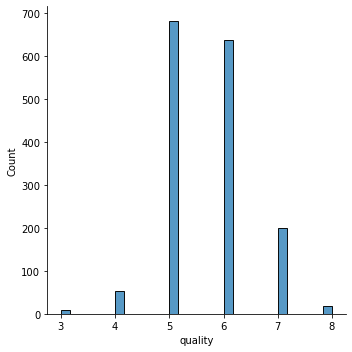

In [7]:
sns.displot(df['quality']);

In [8]:
numeric_variables = df.select_dtypes(include=[np.number])
#corr
corr = numeric_variables.corr()

In [9]:
print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:xlabel='chlorides'>

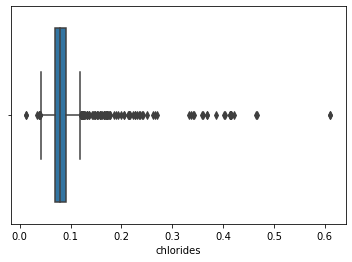

In [10]:
sns.boxplot (x = df['chlorides'])

<AxesSubplot:xlabel='sulphates'>

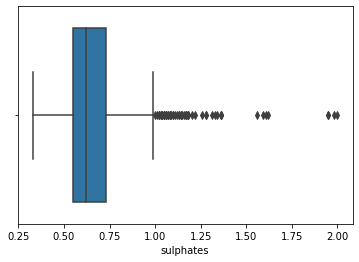

In [11]:
sns.boxplot (x = df['sulphates'])

<AxesSubplot:>

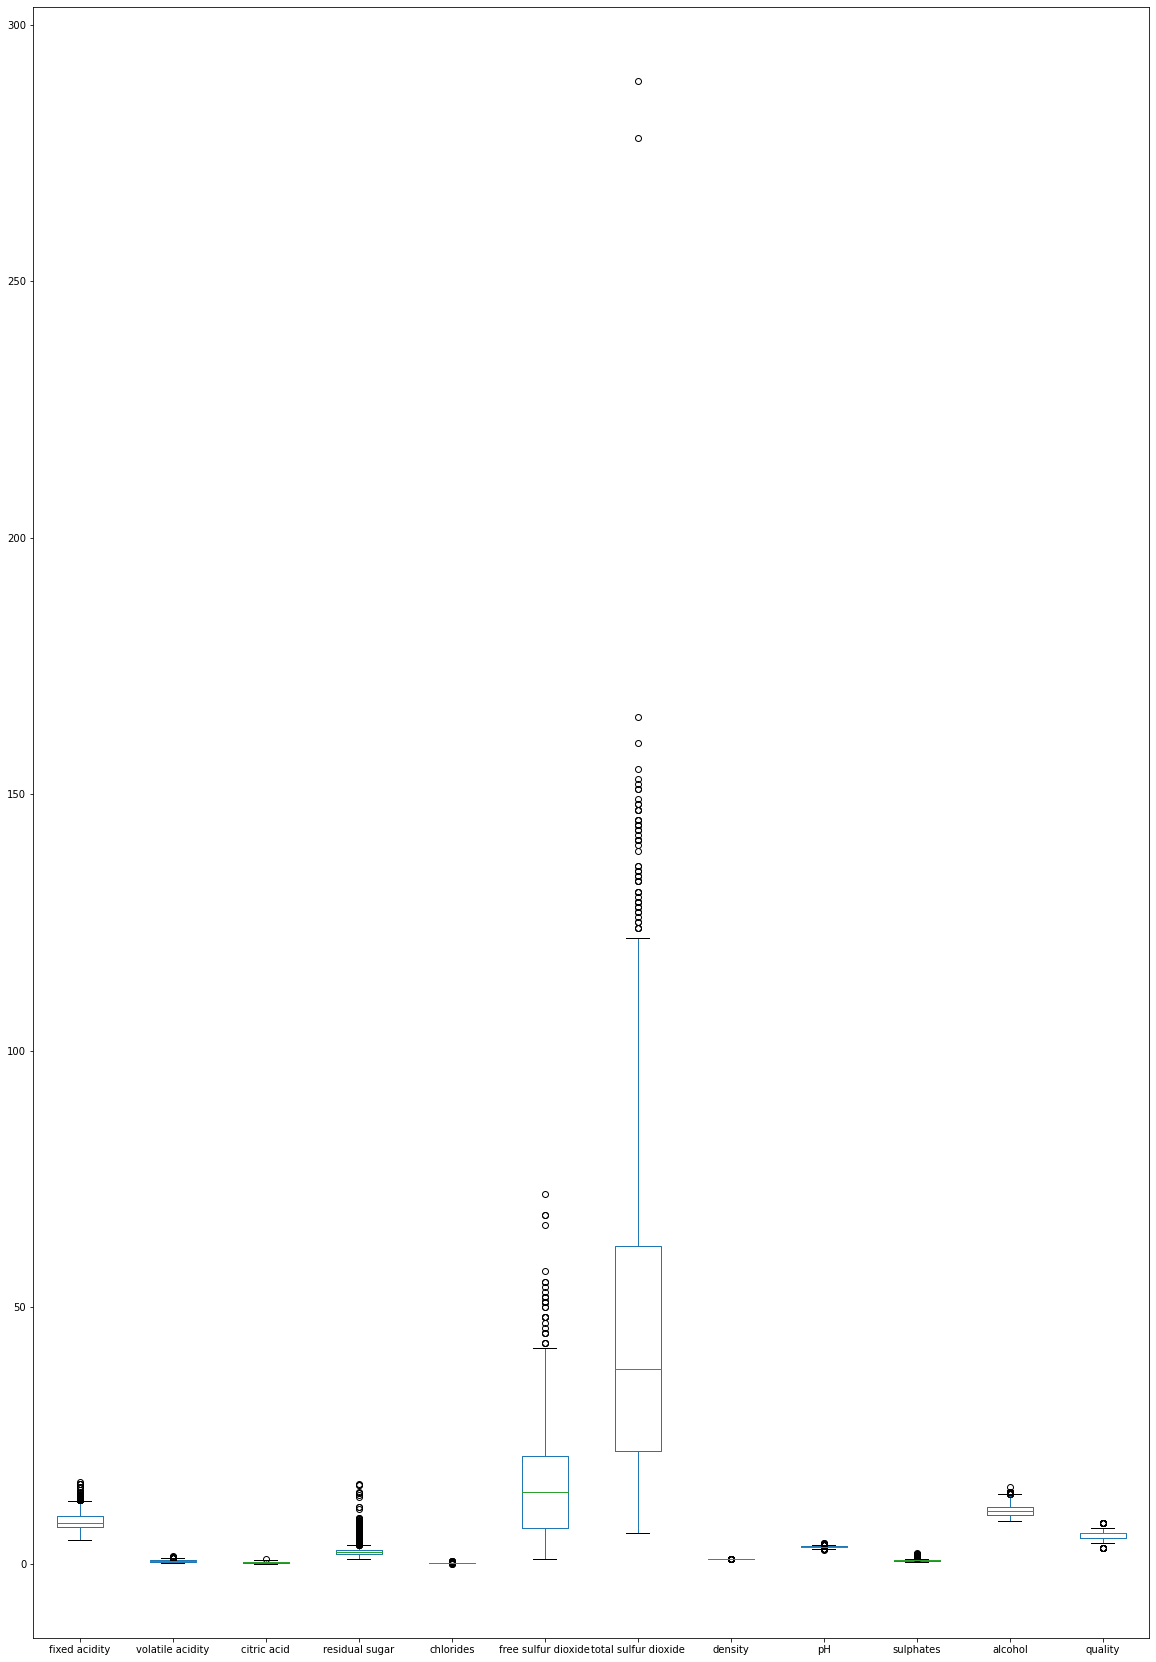

In [12]:
df.plot(kind='box',figsize=(20,30))

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [ ]:
sns.pairplot(df, diag_kind="kde")

# Data wrangling

In [24]:
from scipy import stats

z = np.abs (stats.zscore(df))
print(z)

df = df[(z<3).all(axis=1)]

[[0.55292997 1.05091371 1.39039974 ... 0.99985592 0.84412477 0.40099875]
 [0.3099004  2.11933582 1.39039974 ... 0.6081737  0.84412477 0.40099875]
 [0.3099004  1.40705441 1.18083057 ... 0.6081737  0.84412477 0.40099875]
 ...
 [1.22126131 0.07686519 0.70929993 ... 0.56687296 0.43573421 0.40099875]
 [1.46429088 0.72445139 0.76169222 ... 0.21649148 0.84412477 0.40099875]
 [1.40353349 1.26400088 1.07203802 ... 0.56687296 0.43573421 0.40099875]]


In [16]:
X = df.drop(['quality','goodquality'],axis=1)
y = df['goodquality']

In [17]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df.to_csv("train_modified.csv",index=False)

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Selection Model

In [19]:
def clas(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 10)
    model.fit(X_train,y_train)
    print('Accuracy: ', model.score(X_test,y_test)*100)
    y_pred = model.predict(X_test)
    sns.distplot((y_test-y_pred),bins=50);
  

# Decision Tree

Accuracy:  89.00343642611683
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       250
           1       0.83      0.93      0.87        41

    accuracy                           0.96       291
   macro avg       0.91      0.95      0.93       291
weighted avg       0.96      0.96      0.96       291



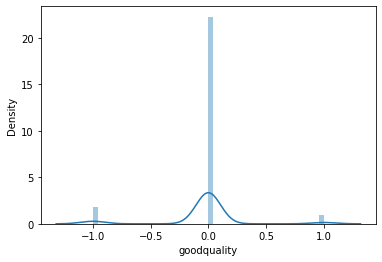

In [20]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=10)
clas(model,X,y)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Random Forest

Accuracy:  93.12714776632302
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       250
           1       0.97      0.88      0.92        41

    accuracy                           0.98       291
   macro avg       0.98      0.94      0.96       291
weighted avg       0.98      0.98      0.98       291



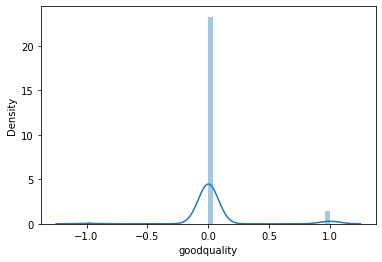

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=10)
clas(model,X,y)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# AdaBoost

Accuracy:  87.2852233676976


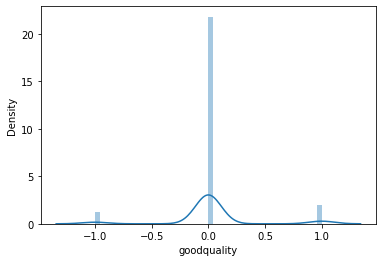

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
clas(model,X,y)

# GradientBoostingClassifier

Accuracy:  90.03436426116839


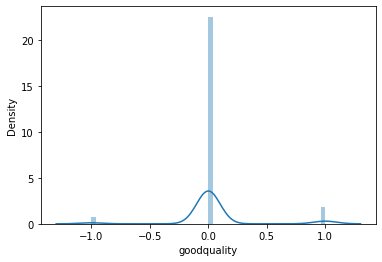

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=1)
clas(model,X,y)

# The best model is Random Forest